# Active User - Session에 timestamp 추가

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [2]:
users_df = pd.read_csv('airbnb-recruiting-new-user-bookings/users_df.csv')
sessions_df = pd.read_csv('airbnb-recruiting-new-user-bookings/sessions.csv')
countries_df = pd.read_csv('airbnb-recruiting-new-user-bookings/countries.csv')
age_gender_df = pd.read_csv('airbnb-recruiting-new-user-bookings/age_gender_bkts.csv')

In [3]:
users_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,2014-06-30,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,2014-06-30,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,2014-06-30,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [4]:
sessions_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  object 
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      124522 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [6]:
# date_account_created, timestamp_first_active, date_first_booking를 날짜 형식으로 변환
users_df['date_account_created'] = pd.to_datetime(users_df['date_account_created'])
users_df['timestamp_first_active'] = pd.to_datetime(users_df['timestamp_first_active'], errors='coerce')
users_df['date_first_booking'] = pd.to_datetime(users_df['date_first_booking'], errors='coerce')

# 변환이 제대로 되었는지 확인
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      124522 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [7]:
# 각 사용자별로 첫 활성화 날짜 기준으로 해당 날짜에 활동한 것을 확인하기 위해 merge 사용
active_users = sessions_df.merge(users_df[['id', 'timestamp_first_active']], left_on='user_id', right_on='id')
active_users

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,timestamp_first_active
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,2014-01-01
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42,2014-01-01
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42,2014-01-01
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42,2014-01-01
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,d1mm9tcy42,2014-01-01
...,...,...,...,...,...,...,...,...
5537952,nw9fwlyb5f,index,data,reservations,iPhone,245.0,nw9fwlyb5f,2014-06-30
5537953,nw9fwlyb5f,unavailabilities,data,unavailable_dates,iPhone,286.0,nw9fwlyb5f,2014-06-30
5537954,nw9fwlyb5f,notifications,submit,notifications,iPhone,830.0,nw9fwlyb5f,2014-06-30
5537955,nw9fwlyb5f,search,click,view_search_results,iPhone,101961.0,nw9fwlyb5f,2014-06-30


In [8]:
len(active_users['user_id'].unique())

73815

세션을 기준으로 활성화 유저라고 판단했을 때, users_df에서 timestamp_first_active 값이 있는 사용자들만 뽑아옴. 

In [9]:
# 각 세션의 초(seconds)를 기반으로 날짜를 예측
# 첫 활성화 날짜(timestamp_first_active)를 기준으로 해당 날짜에 활동했는지 여부를 판단
active_users['session_date'] = pd.to_datetime(active_users['timestamp_first_active']) + pd.to_timedelta(active_users['secs_elapsed'], unit='s')
active_users['session_date'] = active_users['session_date'].dt.date
active_users

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,timestamp_first_active,session_date
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,2014-01-01,2014-01-01
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42,2014-01-01,2014-01-01
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42,2014-01-01,2014-01-01
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42,2014-01-01,2014-01-01
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,d1mm9tcy42,2014-01-01,2014-01-01
...,...,...,...,...,...,...,...,...,...
5537952,nw9fwlyb5f,index,data,reservations,iPhone,245.0,nw9fwlyb5f,2014-06-30,2014-06-30
5537953,nw9fwlyb5f,unavailabilities,data,unavailable_dates,iPhone,286.0,nw9fwlyb5f,2014-06-30,2014-06-30
5537954,nw9fwlyb5f,notifications,submit,notifications,iPhone,830.0,nw9fwlyb5f,2014-06-30,2014-06-30
5537955,nw9fwlyb5f,search,click,view_search_results,iPhone,101961.0,nw9fwlyb5f,2014-06-30,2014-07-01


session 데이터는 2014년 1월부터 존재한다.

In [10]:
# active_users.to_csv("airbnb-recruiting-new-user-bookings/tmp/active_users.csv", index=False)

# DAU (Daily Active Users)

In [11]:
# 각 날짜별로 활성 사용자 수를 계산하여 DAU를 구하기
dau = active_users.groupby('session_date')['user_id'].nunique().reset_index()
dau.columns = ['date', 'DAU']

In [12]:
dau

,date,DAU
0,2014-01-01,134
1,2014-01-02,374
2,2014-01-03,512
3,2014-01-04,571
4,2014-01-05,603
...,...,...
196,2014-07-16,41
197,2014-07-17,32
198,2014-07-18,22
199,2014-07-19,19


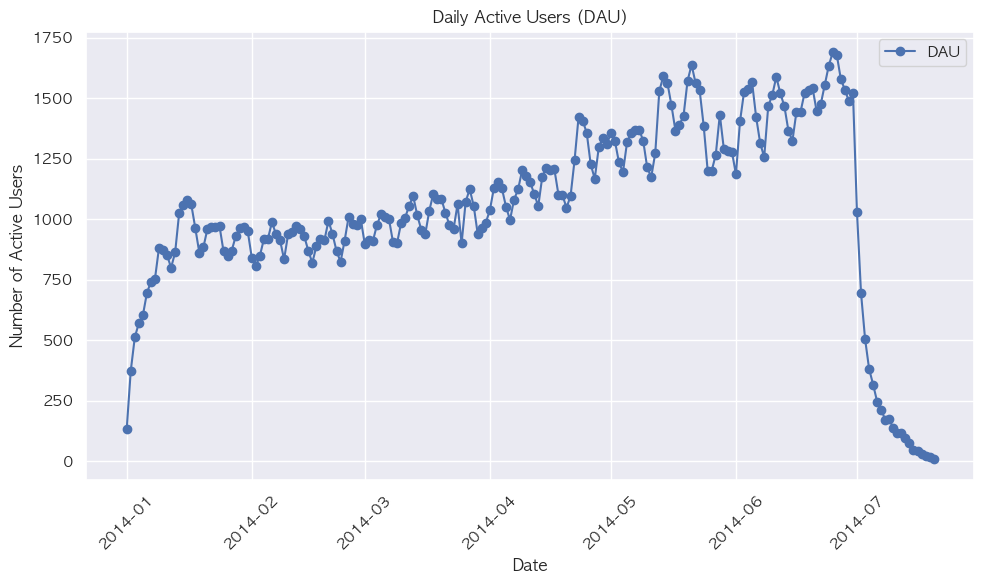

In [13]:
# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(dau['date'], dau['DAU'], marker='o', linestyle='-', color='b', label='DAU')

# 그래프 제목과 축 레이블 설정
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')

# x 축 날짜 형식 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.grid(True)
plt.legend()
plt.show()

# WAU (Weekly Active Users)

In [14]:
# 각 주간별로 활성 사용자 수 계산
active_users['session_date'] = pd.to_datetime(active_users['session_date'])
active_users['week'] = active_users['session_date'].dt.to_period('W-MON')  # 주간 기준 설정 (월요일 시작)
wau = active_users.groupby('week')['user_id'].nunique().reset_index()
wau.columns = ['week', 'WAU']

In [15]:
wau

,week,WAU
0,2013-12-31/2014-01-06,1597
1,2014-01-07/2014-01-13,3057
2,2014-01-14/2014-01-20,3704
3,2014-01-21/2014-01-27,3616
4,2014-01-28/2014-02-03,3516
5,2014-02-04/2014-02-10,3595
6,2014-02-11/2014-02-17,3525
7,2014-02-18/2014-02-24,3545
8,2014-02-25/2014-03-03,3687
9,2014-03-04/2014-03-10,3762


In [16]:
# 주간 기간 문자열을 '/'을 기준으로 분리하여 시작일과 종료일을 추출
wau[['start_date', 'end_date']] = wau['week'].apply(lambda x: pd.Series(str(x).split('/')))
wau

,week,WAU,start_date,end_date
0,2013-12-31/2014-01-06,1597,2013-12-31,2014-01-06
1,2014-01-07/2014-01-13,3057,2014-01-07,2014-01-13
2,2014-01-14/2014-01-20,3704,2014-01-14,2014-01-20
3,2014-01-21/2014-01-27,3616,2014-01-21,2014-01-27
4,2014-01-28/2014-02-03,3516,2014-01-28,2014-02-03
5,2014-02-04/2014-02-10,3595,2014-02-04,2014-02-10
6,2014-02-11/2014-02-17,3525,2014-02-11,2014-02-17
7,2014-02-18/2014-02-24,3545,2014-02-18,2014-02-24
8,2014-02-25/2014-03-03,3687,2014-02-25,2014-03-03
9,2014-03-04/2014-03-10,3762,2014-03-04,2014-03-10


In [17]:
# 시작일과 종료일을 datetime 형식으로 변환
wau['start_date'] = pd.to_datetime(wau['start_date'])
wau['end_date'] = pd.to_datetime(wau['end_date'])

In [18]:
wau

,week,WAU,start_date,end_date
0,2013-12-31/2014-01-06,1597,2013-12-31,2014-01-06
1,2014-01-07/2014-01-13,3057,2014-01-07,2014-01-13
2,2014-01-14/2014-01-20,3704,2014-01-14,2014-01-20
3,2014-01-21/2014-01-27,3616,2014-01-21,2014-01-27
4,2014-01-28/2014-02-03,3516,2014-01-28,2014-02-03
5,2014-02-04/2014-02-10,3595,2014-02-04,2014-02-10
6,2014-02-11/2014-02-17,3525,2014-02-11,2014-02-17
7,2014-02-18/2014-02-24,3545,2014-02-18,2014-02-24
8,2014-02-25/2014-03-03,3687,2014-02-25,2014-03-03
9,2014-03-04/2014-03-10,3762,2014-03-04,2014-03-10


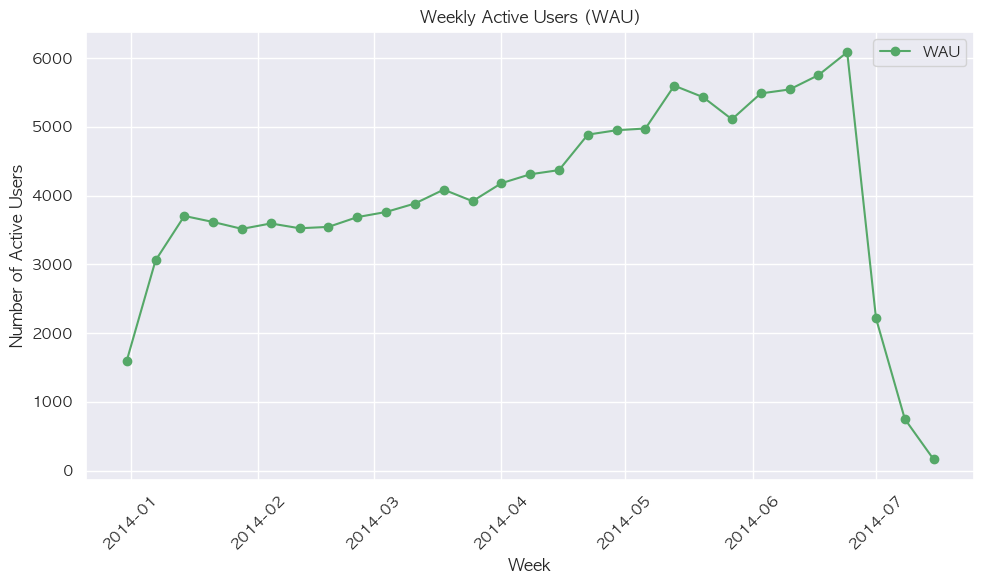

In [19]:
# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(wau['start_date'], wau['WAU'], marker='o', linestyle='-', color='g', label='WAU')

# 그래프 제목과 축 레이블 설정
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Number of Active Users')

# x 축 날짜 형식 설정
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.grid(True)
plt.legend()
plt.show()

# MAU (Monthly Active Users)

In [20]:
# 각 월간별로 활성 사용자 수 계산
active_users['session_date'] = pd.to_datetime(active_users['session_date'])
active_users['month'] = active_users['session_date'].dt.to_period('M')  # 월간 기준 설정
mau = active_users.groupby('month')['user_id'].nunique().reset_index()
mau.columns = ['month', 'MAU']

In [21]:
mau

,month,MAU
0,2014-01,10113
1,2014-02,10714
2,2014-03,12526
3,2014-04,14136
4,2014-05,16685
5,2014-06,17762
6,2014-07,2583


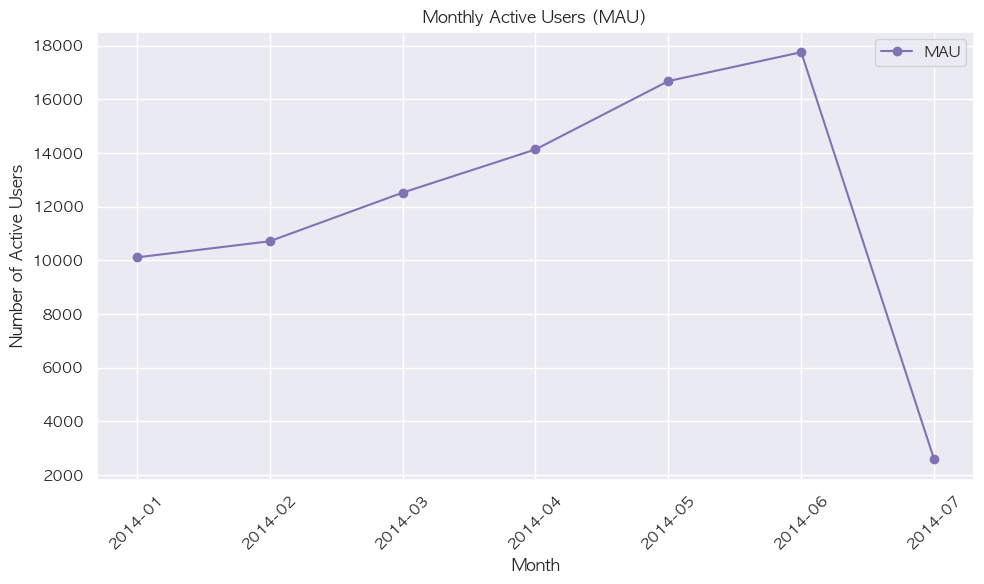

In [22]:
# month 컬럼의 값을 문자열로 변환
mau['month'] = mau['month'].astype(str)

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(mau['month'], mau['MAU'], marker='o', linestyle='-', color='m', label='MAU')

# 그래프 제목과 축 레이블 설정
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Number of Active Users')

# x 축 레이블 각도 설정
plt.xticks(rotation=45)

# 그래프 표시
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------

### 세션 시간이 175570(약 48시간)과 같이 큰 값이 있다. 이러한 값은 사용자가 창을 닫지 않아서 생긴 값이다. </br> 이를 방지하기 위해, 사용자 아이디(user_id)와 timestamp_first_active가 같은 행들 중 최상위 값만 두고 나머지는 지워보자. 

In [23]:
# user_id와 timestamp_first_active 컬럼을 기준으로 중복 행 제거
active_users_unique_session = active_users.drop_duplicates(subset=['user_id', 'timestamp_first_active'])
active_users_unique_session

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,timestamp_first_active,session_date,week,month
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,2014-01-01,2014-01-01,2013-12-31/2014-01-06,2014-01
127,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0,yo8nz8bqcq,2014-01-01,2014-01-01,2013-12-31/2014-01-06,2014-01
136,4grx6yxeby,verify,-unknown-,-unknown-,Windows Desktop,65080.0,4grx6yxeby,2014-01-01,2014-01-01,2013-12-31/2014-01-06,2014-01
152,ncf87guaf0,lookup,NaN,NaN,Windows Desktop,2204.0,ncf87guaf0,2014-01-01,2014-01-01,2013-12-31/2014-01-06,2014-01
304,4rvqpxoh3h,campaigns,-unknown-,-unknown-,iPhone,375.0,4rvqpxoh3h,2014-01-01,2014-01-01,2013-12-31/2014-01-06,2014-01
...,...,...,...,...,...,...,...,...,...,...,...
5537475,zxodksqpep,edit,view,edit_profile,Mac Desktop,18034.0,zxodksqpep,2014-06-30,2014-06-30,2014-06-24/2014-06-30,2014-06
5537585,mhewnxesx9,confirm_email,click,confirm_email_link,iPhone,338615.0,mhewnxesx9,2014-06-30,2014-07-03,2014-07-01/2014-07-07,2014-07
5537823,6o3arsjbb4,ajax_refresh_subtotal,click,change_trip_characteristics,Mac Desktop,1432.0,6o3arsjbb4,2014-06-30,2014-06-30,2014-06-24/2014-06-30,2014-06
5537841,jh95kwisub,search,click,view_search_results,iPhone,2905.0,jh95kwisub,2014-06-30,2014-06-30,2014-06-24/2014-06-30,2014-06


이렇게해서 first_active_user로 active_user을 계산하면, 그냥 first_active_user로 계산하는거랑 뭐가 다른가...?